In [2]:
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
df_final=pd.read_csv("../../data/silver/master_weather_merged/toronto_master_weather_merged.csv")

In [5]:
train_df = df_final[df_final['ds'] < '2024-01-01'].copy()
test_df = df_final[df_final['ds'] >= '2024-01-01'].copy()

print(f"Training Weeks: {len(train_df)}")
print(f"Testing Weeks: {len(test_df)}")

Training Weeks: 521
Testing Weeks: 93


In [6]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=False)

In [7]:
m.add_country_holidays(country_name='CA')

In [8]:
print("Training Prophet model...")
m.fit(train_df[['ds', 'y']])

23:24:53 - cmdstanpy - INFO - Chain [1] start processing


Training Prophet model...


23:24:54 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = m.make_future_dataframe(periods=len(test_df), freq='W-MON')
forecast = m.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Canada Day,Canada Day_lower,Canada Day_upper,Christmas Day,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,614,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.0,614.0,614.000000
mean,2019-11-21 12:00:00,182.286689,147.045180,215.838877,181.103962,183.483453,0.014346,0.014346,0.014346,0.017043,...,-0.565375,-0.565375,-0.565375,-0.289667,-0.289667,-0.289667,0.0,0.0,0.0,181.431647
min,2014-01-06 00:00:00,106.517533,20.468225,89.374609,106.517533,106.517533,0.000000,0.000000,0.000000,0.000000,...,-42.853758,-42.853758,-42.853758,-41.694142,-41.694142,-41.694142,0.0,0.0,0.0,54.080438
25%,2016-12-13 18:00:00,149.555325,111.499417,180.072594,149.555325,149.555325,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-21.629305,-21.629305,-21.629305,0.0,0.0,0.0,146.060099
50%,2019-11-21 12:00:00,189.685544,151.154102,220.101577,189.367441,190.167452,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.073608,8.073608,8.073608,0.0,0.0,0.0,185.381645
75%,2022-10-29 06:00:00,216.959688,183.909789,252.359895,210.659216,219.750385,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.317243,18.317243,18.317243,0.0,0.0,0.0,218.706621
max,2025-10-06 00:00:00,236.295602,233.272765,303.241240,236.295602,251.429517,4.404294,4.404294,4.404294,5.232250,...,5.232250,5.232250,5.232250,32.129777,32.129777,32.129777,0.0,0.0,0.0,266.904001
std,NaN,40.273485,46.275904,46.815824,39.378046,41.470098,0.251161,0.251161,0.251161,0.298377,...,3.957487,3.957487,3.957487,22.119838,22.119838,22.119838,0.0,0.0,0.0,46.445140


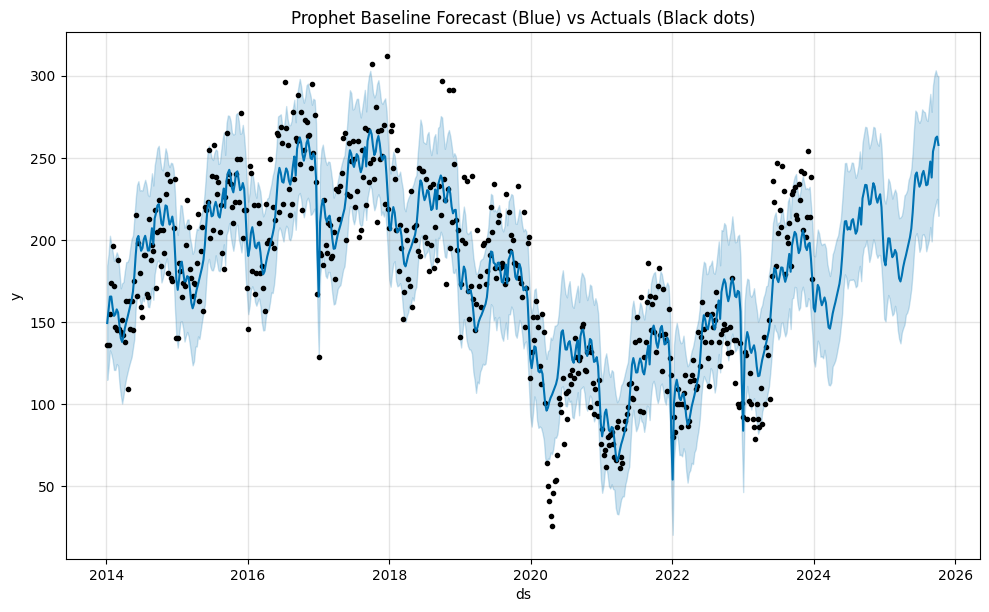

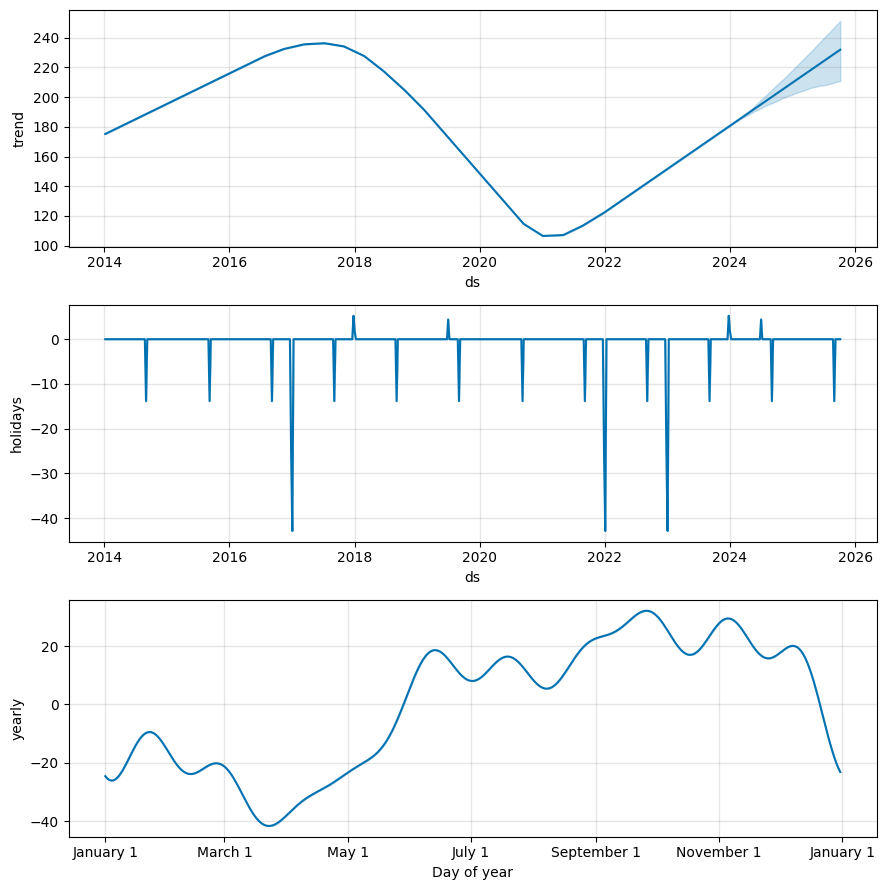

In [ ]:

fig1 = m.plot(forecast)
plt.title("Prophet Baseline Forecast (Blue) vs Actuals (Black dots)")
plt.show()

fig2 = m.plot_components(forecast)
plt.show()